### 2. Forecast the CocaCola prices. 
#### Prepare a document for model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
# Import related Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.formula.api as smf

In [2]:
# Load Dataset
cocacola=pd.read_excel('F:/ExcelR workings/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx')

In [3]:
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
# For ignoring some warnings.
import warnings
warnings.filterwarnings('ignore')

In [5]:
quarter=['Q1','Q2','Q3','Q4']
n=cocacola['Quarter'][0]
print(n[0:2], n[3:])

Q1 86


### Transformations

In [6]:
cocacola['quarter']=0
cocacola['year']=0
for i in range(42):
    n=cocacola['Quarter'][i]
    cocacola['quarter'][i]=n[0:2]
    cocacola['year'][i]="19"+n[3:]

In [7]:
cc=cocacola.copy()

In [8]:
#Create Dummy variables 
dummy=pd.DataFrame(pd.get_dummies(cocacola['quarter']))
cocacola=pd.concat((cocacola,dummy),axis=1)

In [9]:
# creating log 
log_Sales=np.log(cocacola['Sales'])
cocacola['log_Sales']=log_Sales

In [10]:
# Creating variables t and t_square for further processing.
cocacola['t']=range(1,43)
cocacola['t_square']=cocacola['t']*cocacola['t']

In [11]:
cocacola.head()

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,log_Sales,t,t_square
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,7.458663,1,1
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,7.716443,2,4
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,7.837477,3,9
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,7.675529,4,16
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,7.344602,5,25


In [12]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   quarter    42 non-null     object 
 3   year       42 non-null     int64  
 4   Q1         42 non-null     uint8  
 5   Q2         42 non-null     uint8  
 6   Q3         42 non-null     uint8  
 7   Q4         42 non-null     uint8  
 8   log_Sales  42 non-null     float64
 9   t          42 non-null     int32  
 10  t_square   42 non-null     int32  
dtypes: float64(2), int32(2), int64(1), object(2), uint8(4)
memory usage: 2.3+ KB


## Visualizations

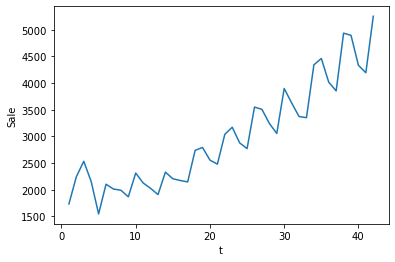

In [13]:
# Line Plot
sns.lineplot(x="t", y="Sales", data=cocacola)
plt.ylabel("Sale")
plt.xlabel("t")
plt.show()

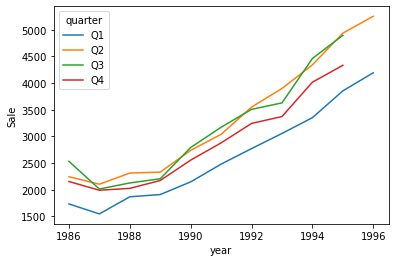

In [14]:
# Line Plot quarterly
sns.lineplot(x="year", y="Sales", hue="quarter",data=cocacola)
plt.ylabel("Sale")
plt.xlabel("year")
plt.show()

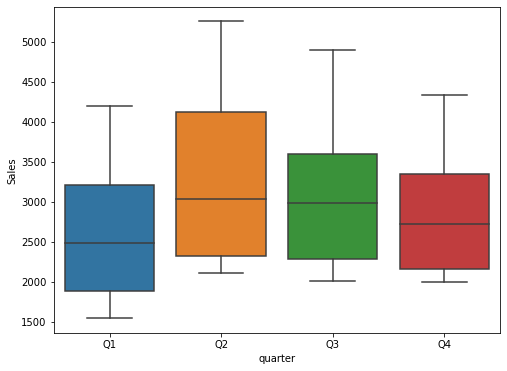

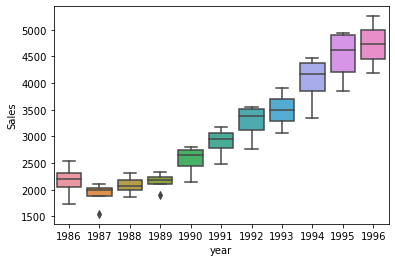

In [15]:
# Box Plots
plt.figure(figsize=(8,6))
sns.boxplot(x="quarter", y="Sales", data=cocacola)
plt.show()
sns.boxplot(x="year", y="Sales", data=cocacola)
plt.show()

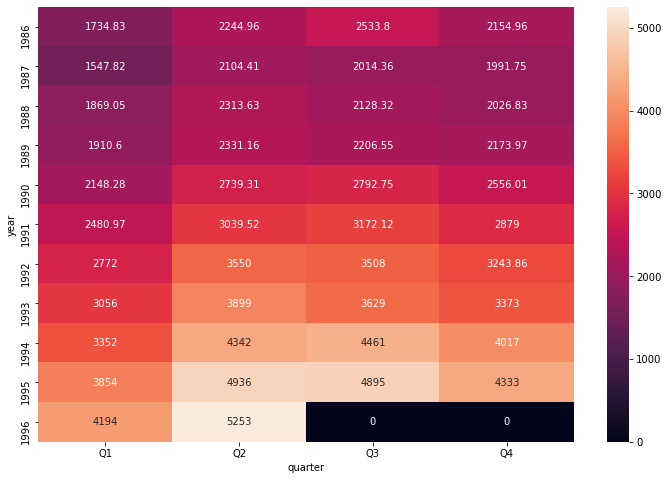

In [16]:
# Heatmap
plt.figure(figsize=(12,8))
heatmap_y_quarter=pd.pivot_table(data=cocacola, values='Sales', index='year', columns='quarter', aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_y_quarter,annot=True, fmt='g') # fmt is format for grid values
plt.show()

### Spliting Data

In [17]:
train=cocacola.head(38)
test=cocacola.tail(4)

In [18]:
train

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,log_Sales,t,t_square
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,7.458663,1,1
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,7.716443,2,4
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,7.837477,3,9
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,7.675529,4,16
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,7.344602,5,25
5,Q2_87,2104.411995,Q2,1987,0,1,0,0,7.651791,6,36
6,Q3_87,2014.362999,Q3,1987,0,0,1,0,7.608058,7,49
7,Q4_87,1991.746998,Q4,1987,0,0,0,1,7.596767,8,64
8,Q1_88,1869.049999,Q1,1988,1,0,0,0,7.533186,9,81
9,Q2_88,2313.631996,Q2,1988,0,1,0,0,7.746574,10,100


In [19]:
test

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,log_Sales,t,t_square
38,Q3_95,4895.0,Q3,1995,0,0,1,0,8.495970,39,1521
39,Q4_95,4333.0,Q4,1995,0,0,0,1,8.374015,40,1600
40,Q1_96,4194.0,Q1,1996,1,0,0,0,8.341410,41,1681
41,Q2_96,5253.0,Q2,1996,0,1,0,0,8.566555,42,1764


## Forecasting Model Based Methods

#### Linear Model

In [20]:
linear_model=smf.ols('Sales~t', data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_L=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_L

591.553295722396

#### Exponential

In [21]:
exp_model=smf.ols('log_Sales~t', data=train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_E=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_E

466.24797310672255

#### Quadratic

In [22]:
quad_model=smf.ols('Sales~t+t_square', data=train).fit()
pred_quad=pd.Series(quad_model.predict(test[['t','t_square']]))
rmse_Q=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_Q

475.5618351831625

#### Additive Seasonality

In [23]:
as_model=smf.ols('Sales~Q1+Q2+Q3', data=train).fit()
pred_as=pd.Series(as_model.predict(test[['Q1','Q2','Q3']]))
rmse_As=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_as))**2))
rmse_As

1860.0238154547264

#### Additive Seasonality with Quadratic

In [24]:
asq_model=smf.ols('Sales~t+t_square+Q1+Q2+Q3', data=train).fit()
pred_asq=pd.Series(asq_model.predict(test[['Q1','Q2','Q3','t','t_square']]))
rmse_Asq=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_asq))**2))
rmse_Asq

301.73800719348355

#### Multiplicative Seasonality

In [25]:
ms_model=smf.ols('log_Sales~Q1+Q2+Q3', data=train).fit()
pred_ms=pd.Series(ms_model.predict(test))
rmse_ms=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_ms)))**2))
rmse_ms

1963.3896400779697

#### Multiplicative Additive Seasonality

In [26]:
mas_model=smf.ols('log_Sales~t+Q1+Q2+Q3', data=train).fit()
pred_mas=pd.Series(mas_model.predict(test))
rmse_mas=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mas)))**2))
rmse_mas

225.52439049816041

#### Multiplicative Additive Seasonality with Quadratic

In [27]:
masq_model=smf.ols('log_Sales~t+t_square+Q1+Q2+Q3', data=train).fit()
pred_masq=pd.Series(masq_model.predict(test))
rmse_masq=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_masq)))**2))
rmse_masq

581.8457187961628

In [28]:
# Compare the results
data={"Model Name": pd.Series(['rmse_L','rmse_E','rmse_Q','rmse_As','rmse_Asq','rmse_ms','rmse_mas','rmse_masq']),
                               "RMSE_Values":pd.Series([rmse_L,rmse_E,rmse_Q,rmse_As,rmse_Asq,rmse_ms,rmse_mas,rmse_masq])}

In [29]:
# Creating Table for Comparisons
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,Model Name,RMSE_Values
6,rmse_mas,225.524390
4,rmse_Asq,301.738007
1,rmse_E,466.247973
2,rmse_Q,475.561835
7,rmse_masq,581.845719
0,rmse_L,591.553296
3,rmse_As,1860.023815
5,rmse_ms,1963.389640


#### According to above table, we are considering Multiplicative Additive Seasonality Model with lowest RMSE.

## Forecasting Data Driven Model

In [30]:
# Importing liabraries for data driven models 
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses
from statsmodels.tsa.holtwinters import Holt as h
from statsmodels.tsa.holtwinters import ExponentialSmoothing as es

In [31]:
# Using same data
cocacola.head()

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,log_Sales,t,t_square
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,7.458663,1,1
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,7.716443,2,4
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,7.837477,3,9
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,7.675529,4,16
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,7.344602,5,25


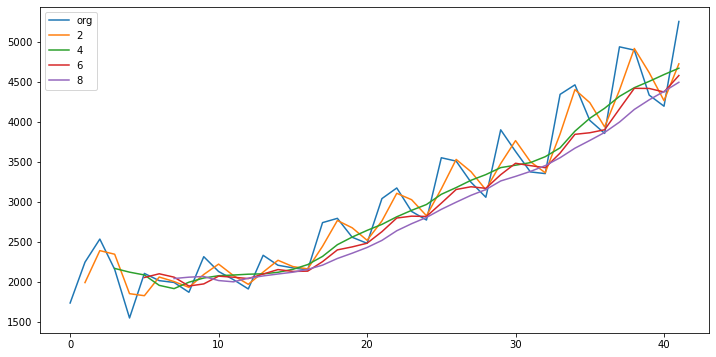

In [32]:
# Visualization for Moving average 
plt.figure(figsize=(12,6))
cocacola.Sales.plot(label="org")
for i in range(2,10,2):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

#### Time series Decomposition Plots

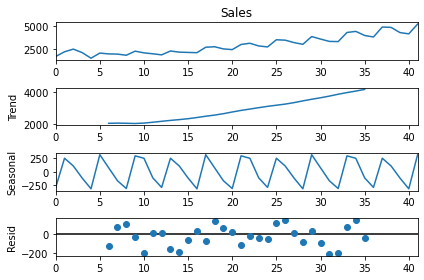

In [33]:
dts=sd(cocacola.Sales,period=12,model='additive')
dts.plot()
plt.show()

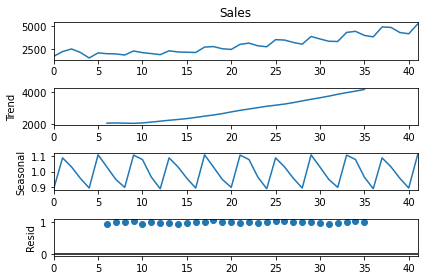

In [34]:
dts=sd(cocacola.Sales,period=12,model='multiplicative')
dts.plot()
plt.show()

In [35]:
import statsmodels.graphics.tsaplots as tsa_plots

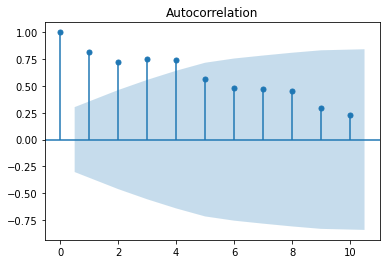

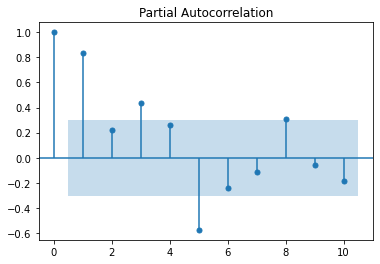

In [36]:
# ACF plots and PACF plots
tsa_plots.plot_acf(cocacola.Sales, lags=10)
tsa_plots.plot_pacf(cocacola.Sales, lags=10)
plt.show()

## Evaluation metric MAPE

In [37]:
# MAPE = Mean Absolute Percentage Error
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

#### Simple Exponential Method

In [38]:
ses_model=ses(train['Sales']).fit(smoothing_level=.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

13.169736631125147

#### Holt Method

In [39]:
h_model=h(train['Sales']).fit(smoothing_level=.8, smoothing_slope=.2)
pred_h=h_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_h,test.Sales)

12.361934141377928

#### Holt winter exponential smoothing with additive seasonality and additive trend

In [40]:
hwest_model=es(train['Sales'], seasonal='add', trend='add', seasonal_periods=12).fit()
pred_hwest=hwest_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwest,test.Sales)

5.13033369964527

#### Holt winter exponential smoothing with multiplicative seasonality and additive trend

In [41]:
hwemst_model=es(train['Sales'], seasonal='mul', trend='add', seasonal_periods=12).fit()
pred_hwemst=hwemst_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwemst,test.Sales)

2.8156721651249392

### Final Model by combining train and test

In [42]:
F_model=es(cocacola['Sales'], seasonal='mul', trend='add', seasonal_periods=12).fit()

In [43]:
F_model.forecast(10)

42    4921.301765
43    4587.847865
44    4532.358828
45    5757.281021
46    5816.320498
47    5208.938124
48    4956.923091
49    6238.309147
50    6082.966385
51    5456.507649
dtype: float64

# ARIMA Model

#### Modifying Data for ARIMA modeling

In [44]:
cocacola['QY']=cocacola['quarter'].map(str)+ " " +cocacola['year'].map(str)

In [45]:
cocacola['date'] = (
    pd.to_datetime(
        cocacola['QY'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
))

In [46]:
cocacola

,Quarter,Sales,quarter,year,Q1,Q2,Q3,Q4,log_Sales,t,t_square,QY,date
0,Q1_86,1734.827000,Q1,1986,1,0,0,0,7.458663,1,1,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2,1986,0,1,0,0,7.716443,2,4,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3,1986,0,0,1,0,7.837477,3,9,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4,1986,0,0,0,1,7.675529,4,16,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1,1987,1,0,0,0,7.344602,5,25,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2,1987,0,1,0,0,7.651791,6,36,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3,1987,0,0,1,0,7.608058,7,49,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4,1987,0,0,0,1,7.596767,8,64,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1,1988,1,0,0,0,7.533186,9,81,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2,1988,0,1,0,0,7.746574,10,100,Q2 1988,1988-04-01


In [47]:
cocacola_new=cocacola[["date"]+["Sales"]]
cocacola_new=cocacola_new.set_index(keys=["date"],drop=True)
cocacola_new.head()

,Sales
date,
1986-01-01,1734.827000
1986-04-01,2244.960999
1986-07-01,2533.804993
1986-10-01,2154.962997
1987-01-01,1547.818996


### Some visualizations

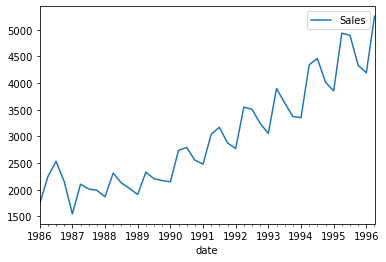

In [48]:
cocacola_new.plot()
plt.show()

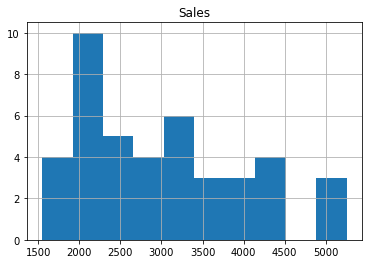

In [49]:
cocacola_new.hist()
plt.show()

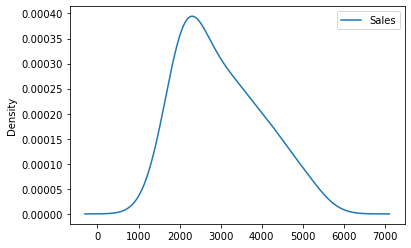

In [50]:
cocacola_new.plot(kind='kde')
plt.show()

### Separate Out Validation Dataset

In [51]:
split_point = len(cocacola_new) - 10
dataset, validation = cocacola_new[0:split_point], cocacola_new[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset1.csv', header=False)
validation.to_csv('validation1.csv', header=False)

Dataset 32, Validation 10


In [52]:
from sklearn.metrics import mean_squared_error as mse

In [53]:
# Load data
train=pd.read_csv("dataset1.csv",header=None, index_col=0, parse_dates=True, squeeze=True)

In [54]:
train.head()

0
1986-01-01    1734.827000
1986-04-01    2244.960999
1986-07-01    2533.804993
1986-10-01    2154.962997
1987-01-01    1547.818996
Name: 1, dtype: float64

In [55]:
# Preparing data
x=train.values
size = int(len(x) * 0.5)
train, test = x[0:size], x[size:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    yhat =history[-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# Report performance
rmse = np.sqrt(mse(test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=2173.967995, expected=2148.278000
predicted=2148.278000, expected=2739.307999
predicted=2739.307999, expected=2792.753998
predicted=2792.753998, expected=2556.009995
predicted=2556.009995, expected=2480.973999
predicted=2480.973999, expected=3039.522995
predicted=3039.522995, expected=3172.115997
predicted=3172.115997, expected=2879.000999
predicted=2879.000999, expected=2772.000000
predicted=2772.000000, expected=3550.000000
predicted=3550.000000, expected=3508.000000
predicted=3508.000000, expected=3243.859993
predicted=3243.859993, expected=3056.000000
predicted=3056.000000, expected=3899.000000
predicted=3899.000000, expected=3629.000000
predicted=3629.000000, expected=3373.000000
Test RMSE: 387.510


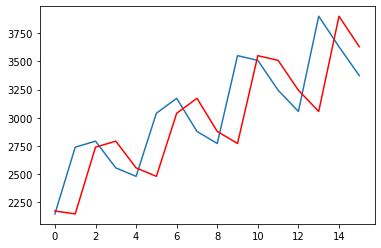

In [56]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Modeling

In [57]:
from statsmodels.tsa.arima_model import ARIMA as a

In [58]:
# Evaluate on Arima model for a given order (p,d,q) and return Rmse
def evaluate_arima_model(x,arima_order):
    x=x.astype('float32') # Preparing training dataset
    train_size=int(len(x)*.50)
    train,test=x[0:train_size],x[train_size:]
    history=[x for x in train]
    pred=list() # Make predictions
    for t in range(len(test)):
        model=a(history,order=arima_order)
        model_fit=model.fit(disp=0) # fitting the model
        yhat=model_fit.forecast()[0]
        pred.append(yhat)
        history.append(test[t])
    rmse=np.sqrt(mse(test,pred))# calculate sample error
    return rmse

In [59]:
# Evaluate combinations of p, d, q values for an ARIMA model
def evaluate_model(dataset, p_values, d_values, q_values):
    dataset=dataset.astype('float32')
    best_score, best_cfg=float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluate_arima_model(train,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f'% (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%3.f' % (best_cfg, best_score))

In [60]:
# Load data
train=pd.read_csv("dataset1.csv",header=None, index_col=0, parse_dates=True, squeeze=True)

In [61]:
# Evaluate parameters using Grid Search
p_values=range(0,5)
d_values=range(0,5)
q_values=range(0,5)
evaluate_model(train.values,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=840.936
ARIMA(0, 0, 1) RMSE=617.892
ARIMA(0, 0, 2) RMSE=450.670
ARIMA(0, 1, 0) RMSE=389.741
ARIMA(0, 1, 1) RMSE=396.141
ARIMA(0, 1, 2) RMSE=354.964
ARIMA(0, 1, 3) RMSE=316.307
ARIMA(0, 1, 4) RMSE=272.872
ARIMA(0, 2, 0) RMSE=593.232
ARIMA(0, 2, 1) RMSE=414.869
ARIMA(0, 2, 2) RMSE=346.957
ARIMA(0, 2, 3) RMSE=351.800
ARIMA(1, 0, 0) RMSE=470.346
ARIMA(1, 1, 0) RMSE=387.222
ARIMA(1, 2, 0) RMSE=574.839
ARIMA(2, 0, 0) RMSE=493.075
ARIMA(2, 1, 0) RMSE=300.158
ARIMA(2, 2, 0) RMSE=485.191
ARIMA(3, 0, 0) RMSE=429.706
ARIMA(3, 1, 0) RMSE=245.267
ARIMA(3, 2, 0) RMSE=157.017
ARIMA(4, 0, 0) RMSE=351.400
ARIMA(4, 1, 0) RMSE=163.619
ARIMA(4, 2, 0) RMSE=161.502
Best ARIMA(3, 2, 0) RMSE=157


In [62]:
# Load data
train=pd.read_csv("dataset1.csv",header=None, index_col=0, parse_dates=True)

In [63]:
x=train.values
x=x.astype('float32')

## Building Model with Best ARIMA parameters

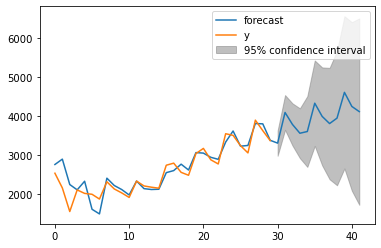

In [64]:
# Fit Model
model=a(x,order=(3,2,0))
model_fit= model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(2, 43)
plt.show()

In [65]:
# summary of fit model
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   30
Model:                 ARIMA(3, 2, 0)   Log Likelihood                -199.742
Method:                       css-mle   S.D. of innovations            165.276
Date:                Wed, 23 Jun 2021   AIC                            409.485
Time:                        23:23:16   BIC                            416.491
Sample:                             2   HQIC                           411.726
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0369      7.855      0.387      0.699     -12.358      18.432
ar.L1.D2.y    -1.0488      0.062    -16.887      0.000      -1.170      -0.927
ar.L2.D2.y    -1.0531      0.058    -18.132      0.0

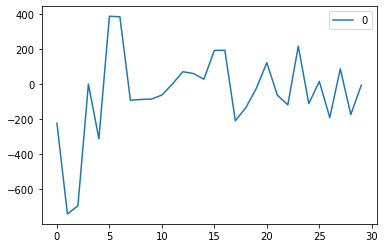

In [66]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

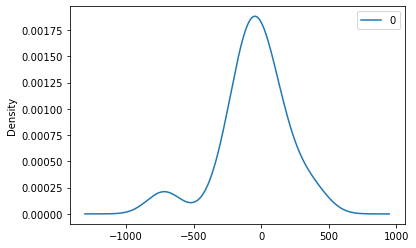

In [67]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [68]:
val=pd.read_csv('validation1.csv',header=None, index_col=0, parse_dates=True)

In [69]:
rmse=np.sqrt(mse(val[1],forecast))
rmse

518.880507521185

In [70]:
#Forecasting
forecast

array([3307.79742123, 4096.96836734, 3788.17622246, 3562.28589185,
       3606.68877188, 4335.25284126, 3995.22185235, 3811.05153904,
       3951.36520952, 4614.28555568])